# Preprocessing and clustering

## Loading import

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
from scipy import sparse
import os
from anndata.experimental.multi_files import AnnCollection
from matplotlib.pyplot import rc_context
import matplotlib as mpl

# import seaborn as sns
# import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=120, frameon=False, figsize=(3, 3), facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.10 louvain==0.7.1 pynndescent==0.5.4


In [3]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

## Input data

In [4]:
wdir = "/Users/xuewei/ZxProjects/CRC/2023_GSE231559/01_preprocessing/03_annotation_marker/"
os.chdir( wdir )

In [5]:
adata = sc.read_h5ad('/Users/xuewei/ZxProjects/CRC/2023_GSE231559/01_preprocessing/write/CRC_01_louvain_umap_20231028.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 56163 × 13401
    obs: 'batch', 'n_genes_by_counts', 'total_counts', 'n_genes', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts_all', 'umap_density_batch', 'louvain'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt', 'ribo', 'hb', 'log1p_mean_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_counts', 'mean', 'std'
    uns: 'batch_colors', 'draw_graph', 'hvg', 'log1p', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'umap', 'umap_density_batch_params'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# Finding marker genes

## Compute a ranking for the highly differential genes in each cluster.

In [7]:
# sc.pp.log1p(adata)
# sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')

In [8]:
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, show=True)
# sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

## Dendrogram

In [9]:
with rc_context({'figure.figsize': (8, 2), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.tl.dendrogram(adata, groupby = 'louvain', cor_method='pearson')
    ax = sc.pl.dendrogram(adata, groupby = 'louvain', show=True, save="_01_louvain.pdf")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain']`


## Annotation

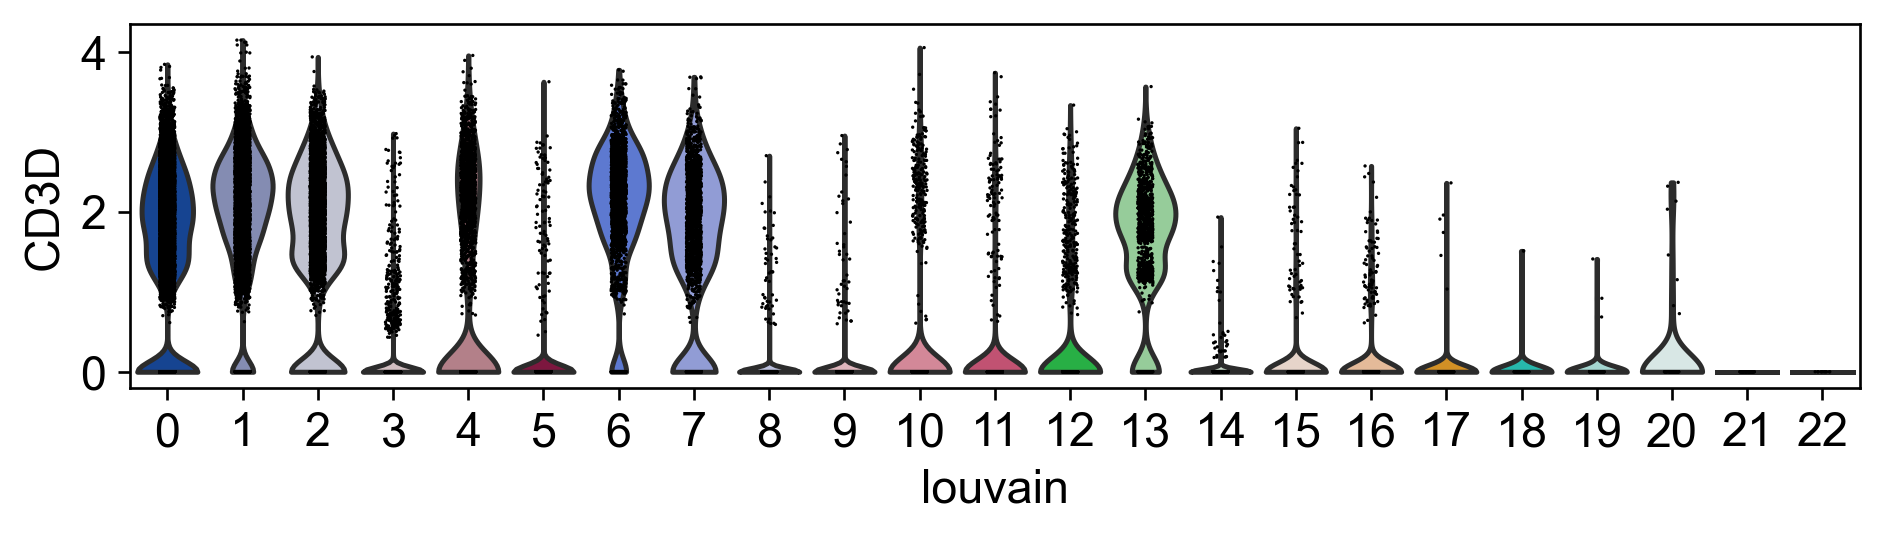

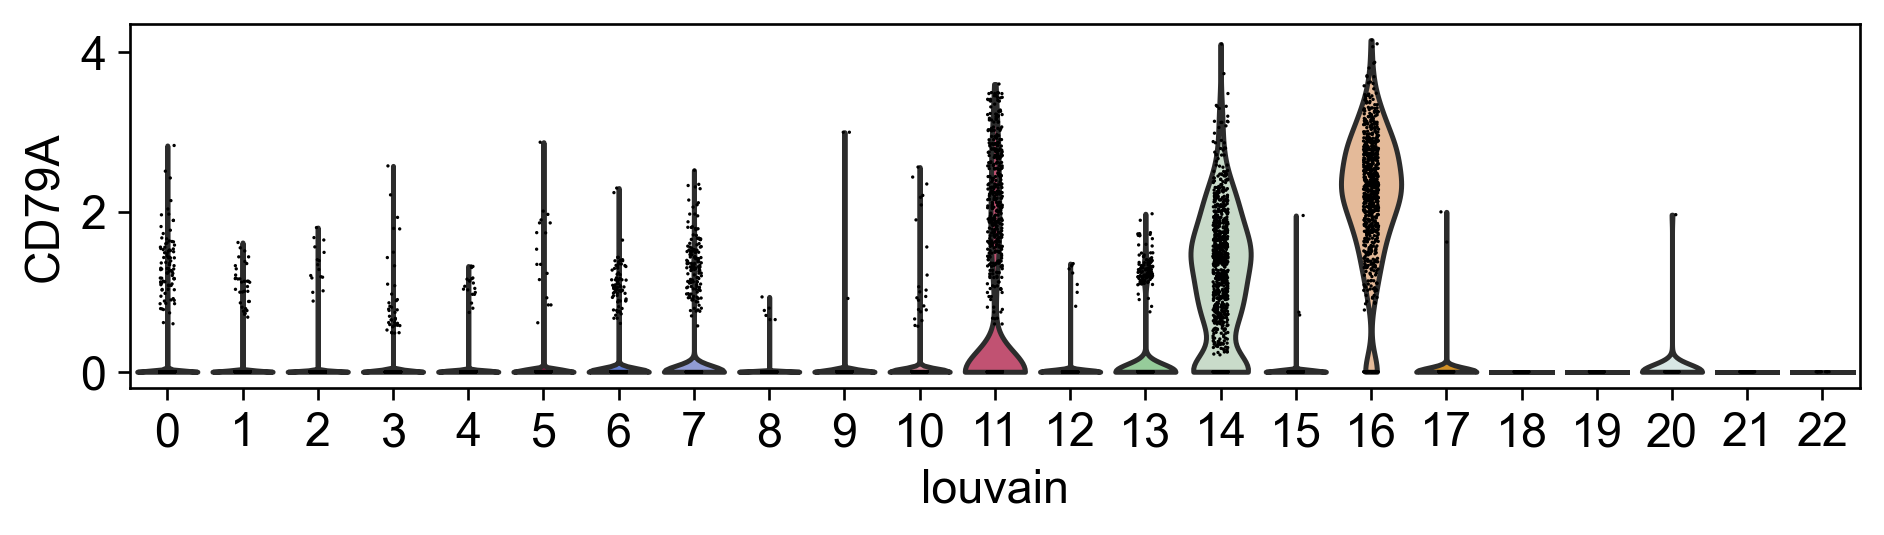

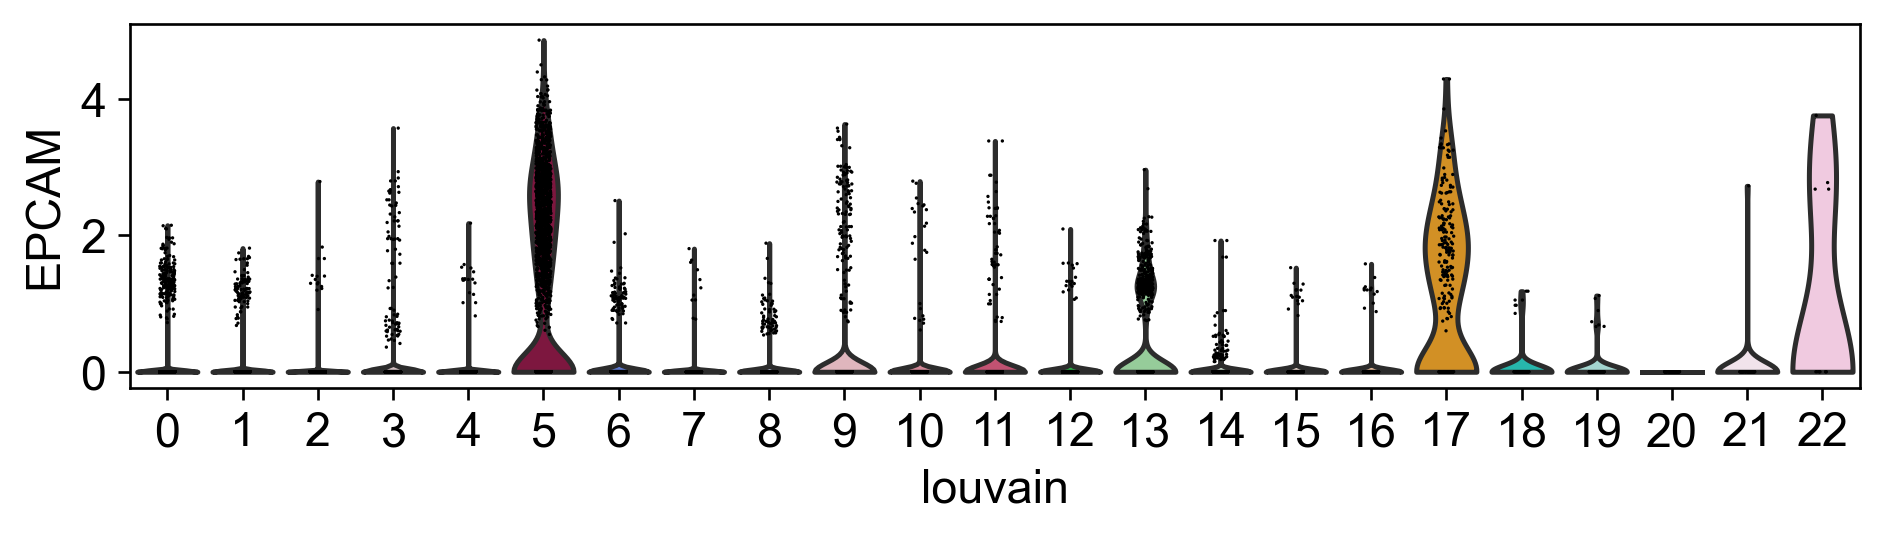

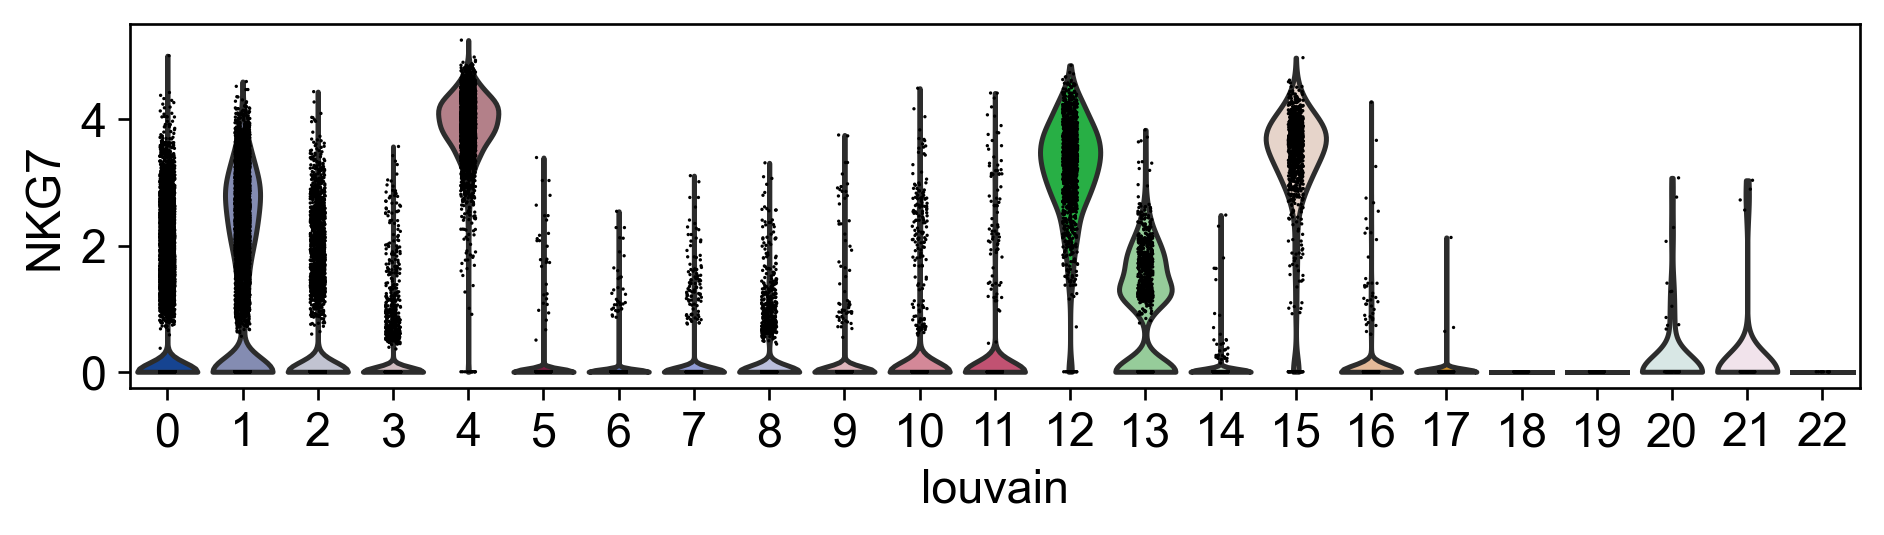

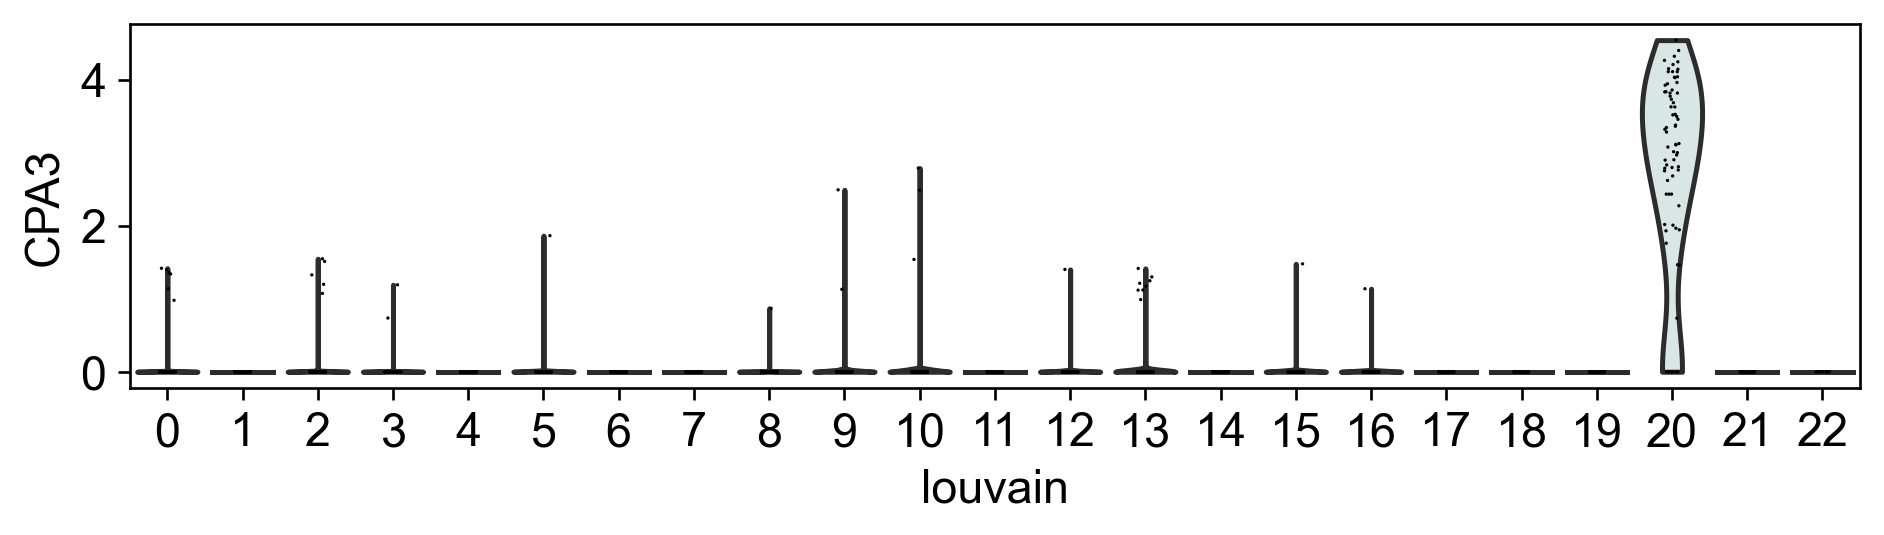

In [10]:
with rc_context({'figure.figsize': (8, 2), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.violin(adata, ['CD3D'], ncols=1, groupby='louvain', show=True)
    sc.pl.violin(adata, ['CD79A'], ncols=1, groupby='louvain', show=True)
    sc.pl.violin(adata, ['EPCAM'], ncols=1, groupby='louvain', show=True)
    sc.pl.violin(adata, ['DCN'], ncols=1, groupby='louvain', show=True)
    sc.pl.violin(adata, ['CLDN5'], ncols=1, groupby='louvain', show=True)
    sc.pl.violin(adata, ['LYZ'], ncols=1, groupby='louvain', show=True)
    sc.pl.violin(adata, ['NKG7'], ncols=1, groupby='louvain', show=True)
    sc.pl.violin(adata, ['CPA3'], ncols=1, groupby='louvain', show=True)

## marker_genes_dict and dotplot

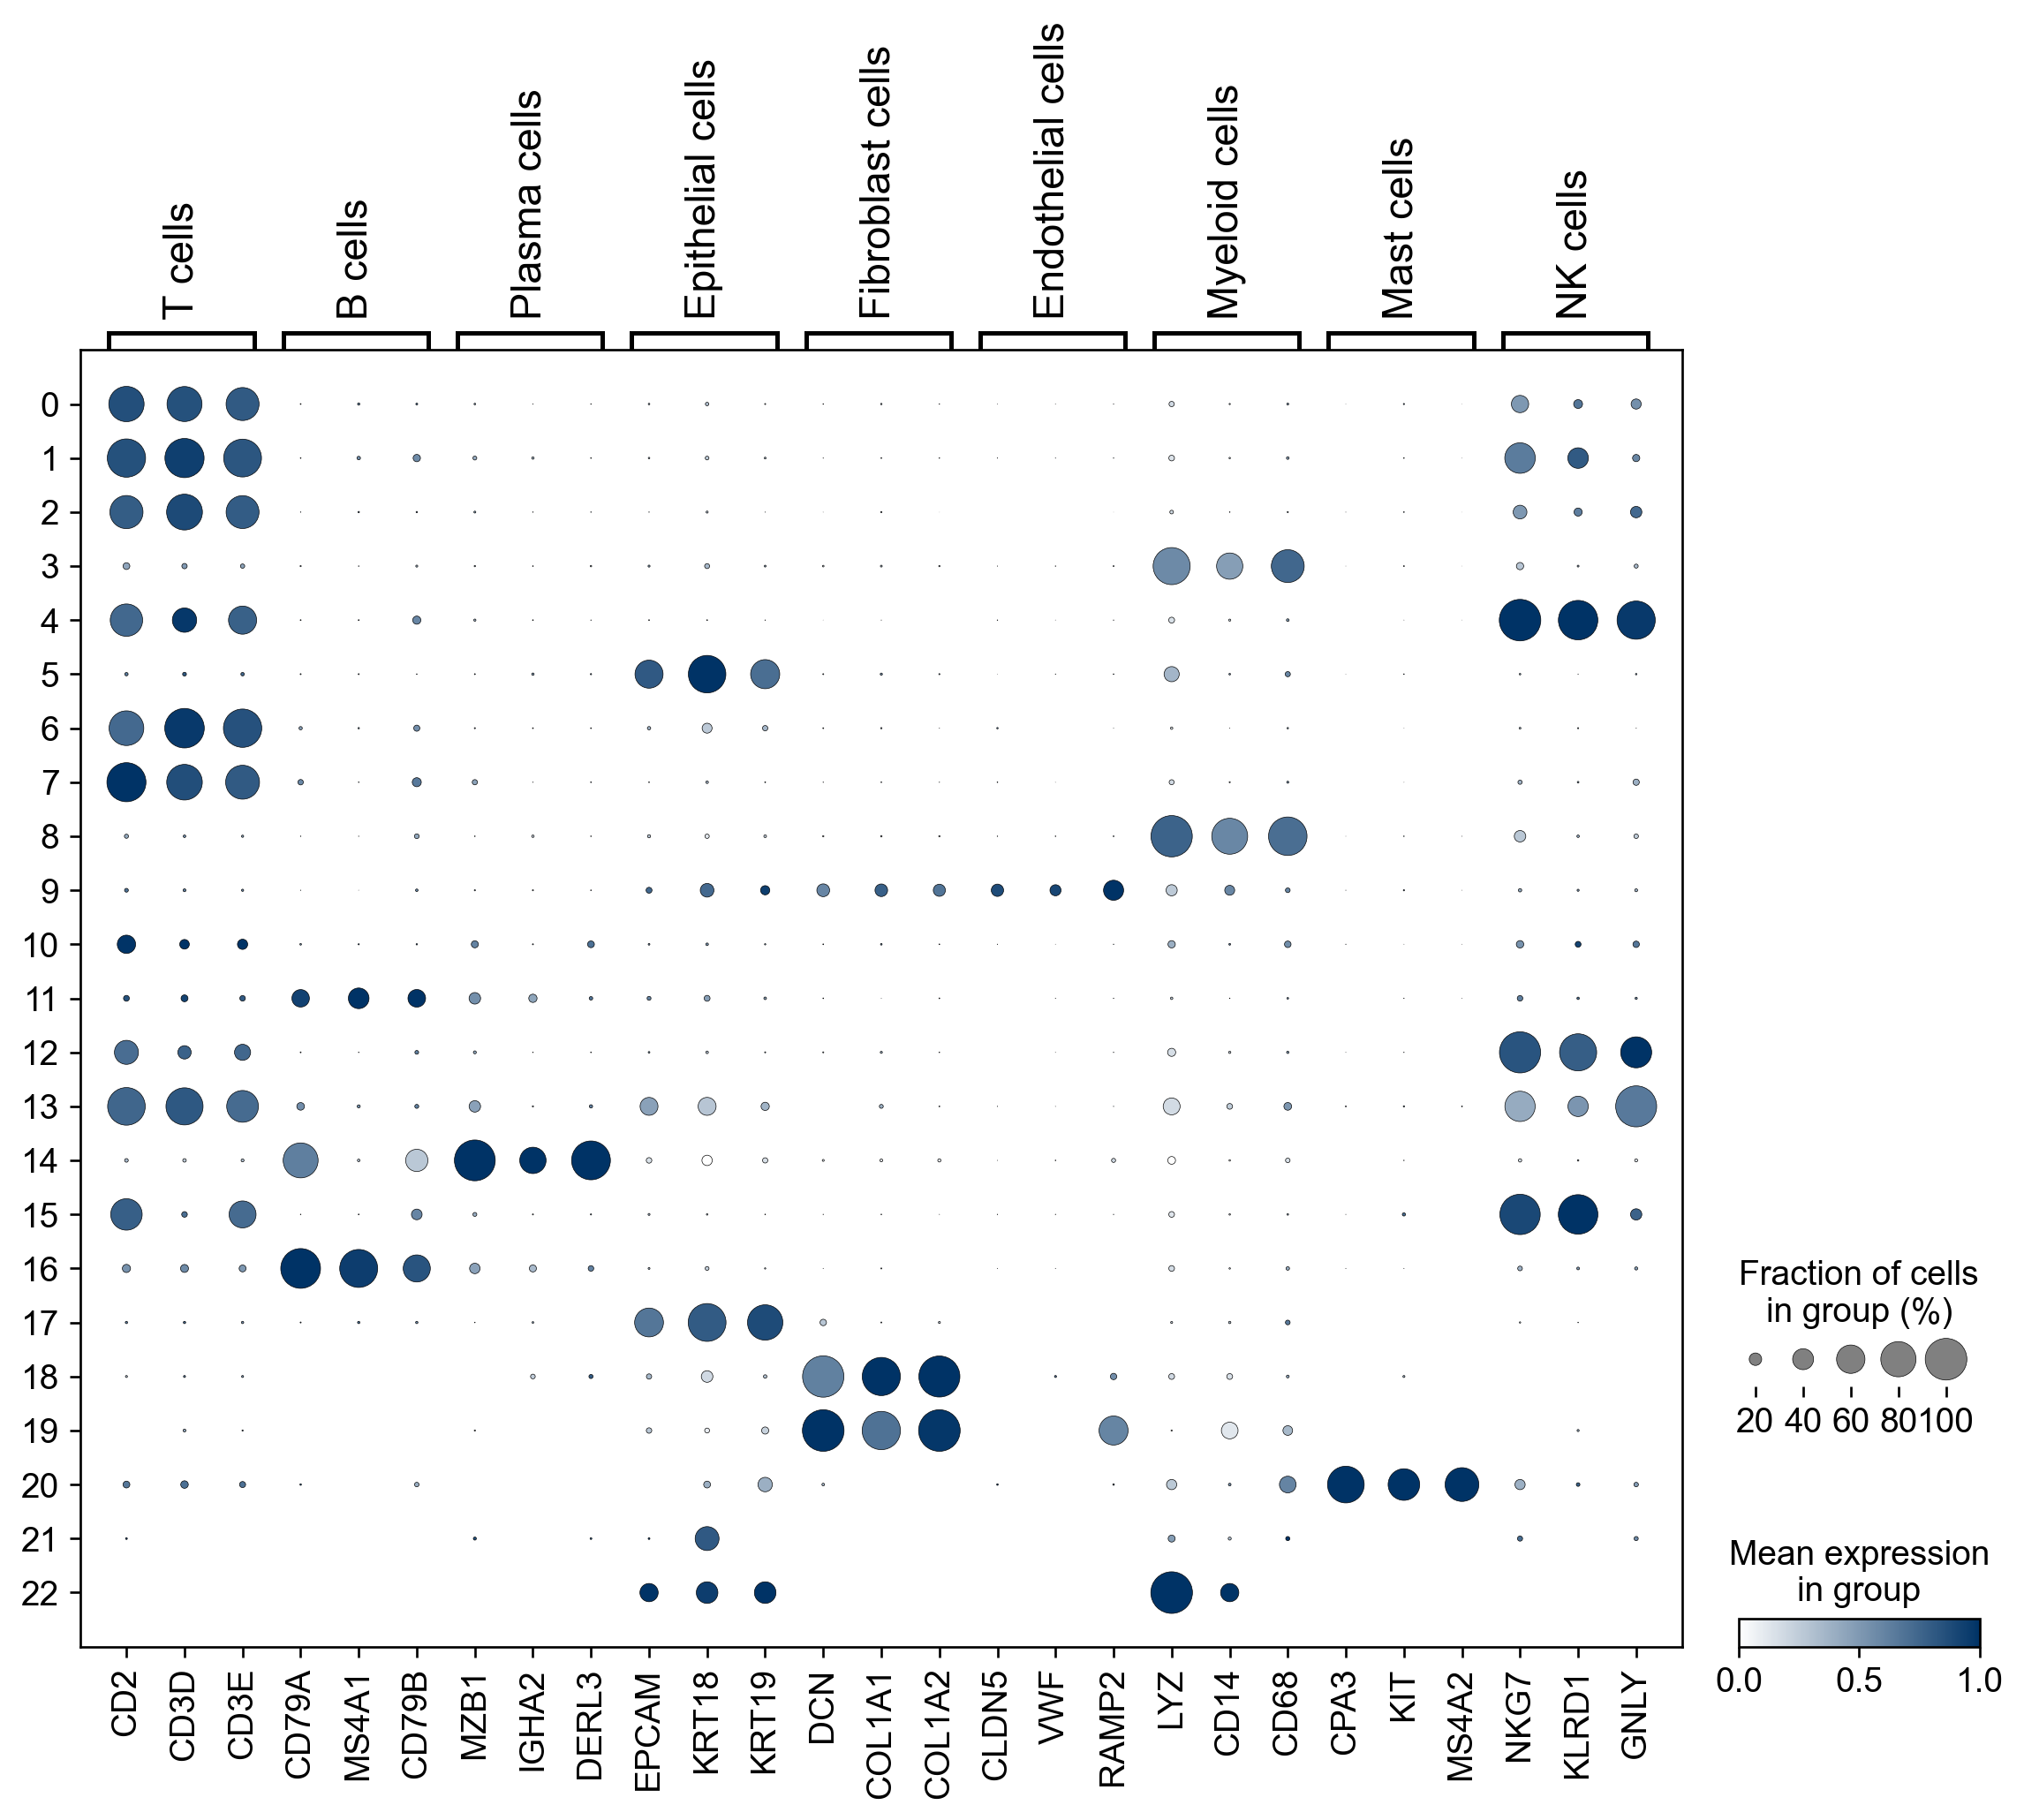

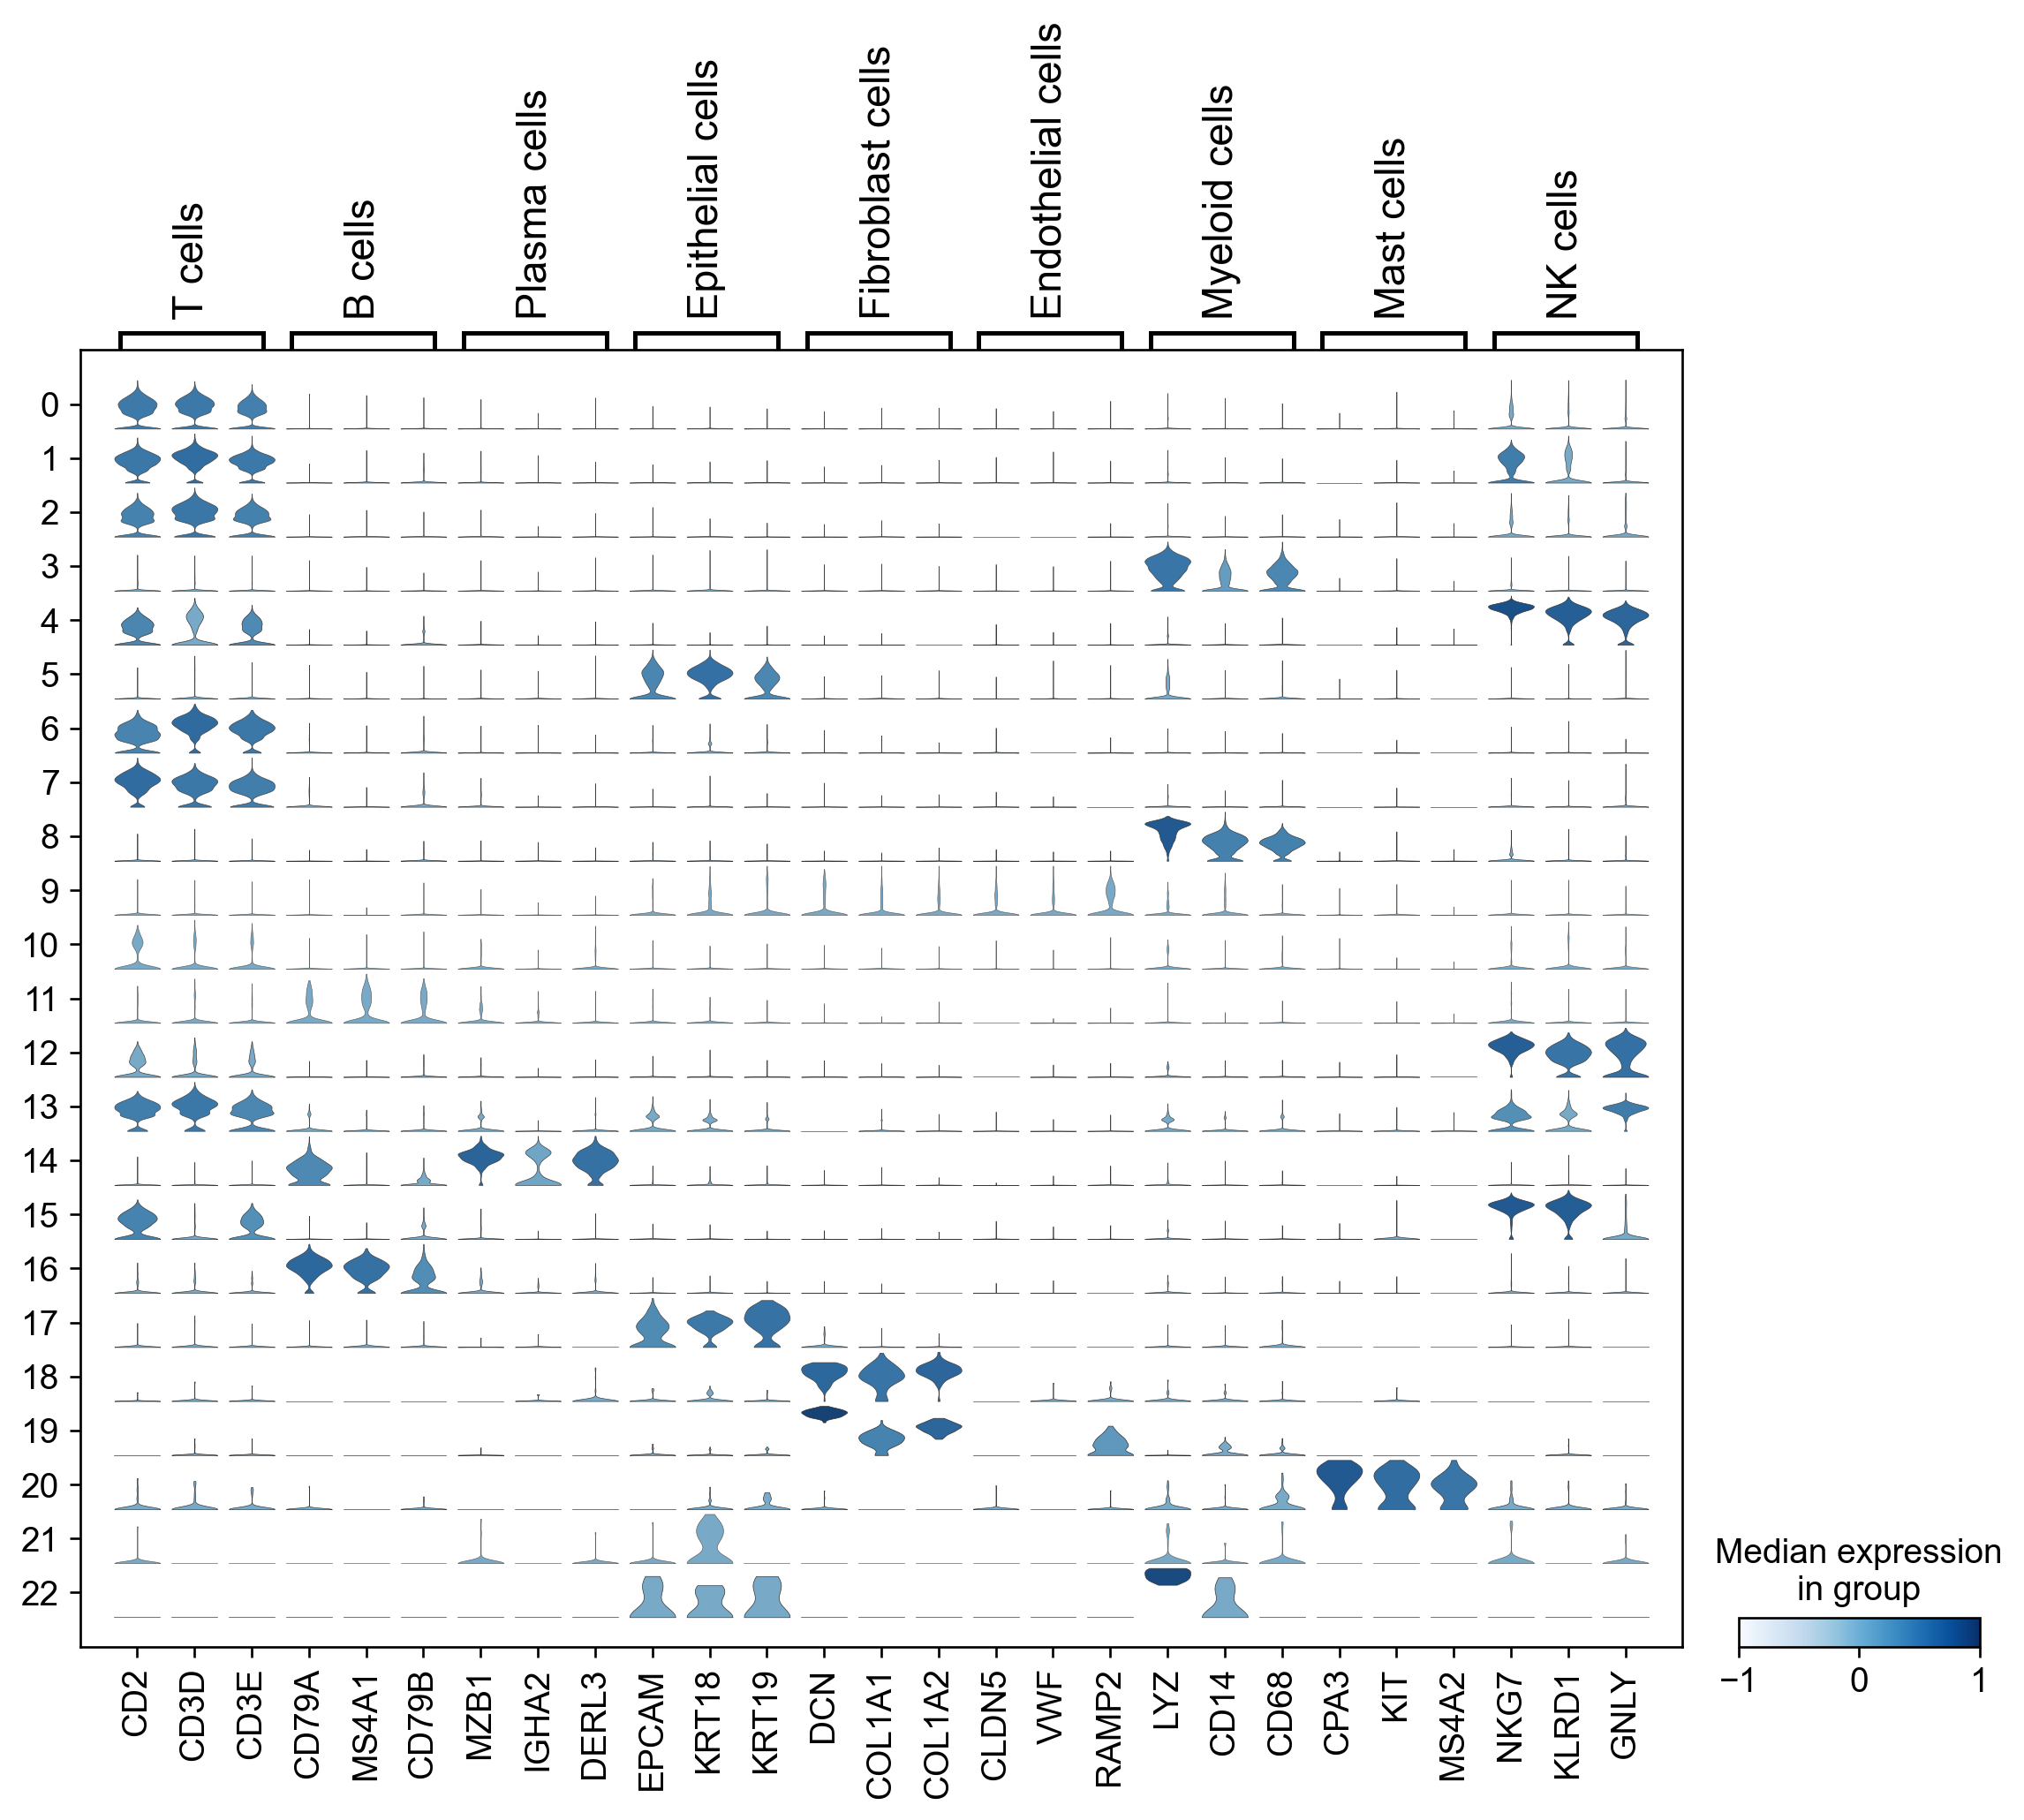

In [11]:
marker_genes_dict = {
    'T cells': ['CD2', 'CD3D', 'CD3E'],
    'B cells': ['CD79A', 'MS4A1', 'CD79B'],
    'Plasma cells': ['MZB1', 'IGHA2', 'DERL3'],
    'Epithelial cells': ['EPCAM', 'KRT18', 'KRT19'],
    'Fibroblast cells': ['DCN', 'COL1A1', 'COL1A2'],
    'Endothelial cells': ['CLDN5', 'VWF', 'RAMP2'],
    'Myeloid cells': ['LYZ', 'CD14', 'CD68'],
    'Mast cells': ['CPA3', 'KIT', 'MS4A2'],
    'NK cells': ['NKG7', 'KLRD1', 'GNLY'],
}

color_loc_1 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#003366')], N=256)

with rc_context({'figure.figsize': (12, 6), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.dotplot(adata, marker_genes_dict, groupby='louvain', cmap=color_loc_1, swap_axes=False, dendrogram=False, 
    mean_only_expressed=True, standard_scale='var', show=True, save="01_marker_genes_dict.pdf")

## Violin of gene expression
with rc_context({'figure.figsize': (12, 6), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.stacked_violin(adata, marker_genes_dict, groupby='louvain', values_to_plot='logfoldchanges', var_group_rotation=90, rotation=0, vmax=1, vmin=-1, 
    standard_scale='var', mean_only_expressed=True, swap_axes=False, dendrogram=False, show=True, save="01_annotation_marker_exp_v2.pdf")

In [12]:
# marker_genes = [
#     'CD8A', 'GZMK', 'CD160', 'KIR2DL4', 'ICOS', # T cells, CD8+ T cells
#     'CTLA4', 'GZMA', # T cells, CD4+ T cells
#     'CD79A', 'MS4A1', # B cells
#     'DCN', 'PDPN', 'POSTN', 'SOX4', 'ACTA2', 'COL1A1', 'COL1A2', 'FAP', # Fibroblast cells
    
#     'IGHA1', 'IGHA2', 'IGHG3', 'IGHG4', 'MZB1', # Plasma B cell
#     'MKI67', 'CST3', # Myeloid cells

#     'TNF', # T helper1 (Th1) cell
#     'ANXA1', # Macrophage cells, Parietal progenitor cells

#     'LAMP3', # Dendritic cell, DC3
#     'CD14', 'CSF1R', 'CD68', 'SPP1', 'LYZ', 'INHBA', # Macrophage cells
#     'NAMPT', 'S100A9', 'IFITM2', # Macrophage cells/Monocyte
#     'CCR7', 'TIMP1', 'CD83', 'CCL19', # Myeloid dendritic cells

#     'MS4A2', 'TPSAB1', 'CPA3', 'KIT', # Mast cells

#     'VWF', 'ENG', 'FLT1', 'CLDN5', # Endothelial cells
#     'EPCAM', 'KRT18', 'KRT19', 'KRT8', 'MUC1', 'CDH1', 'CLDN4', 'CLDN7', 'MUC13', 'MDK', # epithelial cells 
#     'FCGR3A', # NK cells
#     # 'VIM', 'PTPRC' # non-epithelial cells
#     ]

# sc.pl.dotplot(adata, marker_genes, groupby='louvain', show=True)
# sc.pl.stacked_violin(adata, marker_genes, groupby='louvain', rotation=90, show=True)

In [13]:
adata.obs['louvain'].value_counts()

0     15673
1      7376
2      6260
3      4425
4      3123
      ...  
18      110
19      105
20       78
21       65
22       12
Name: louvain, Length: 23, dtype: int64

In [14]:
adata.obs['louvain'].value_counts().sum()

56163

In [15]:
marker_genes_dict = {
    'T cells': ['CD2', 'CD3D', 'CD3E'],
    'B cells': ['CD79A', 'MS4A1', 'CD79B'],
    'Plasma cells': ['MZB1', 'IGHA2', 'DERL3'],
    'Epithelial cells': ['EPCAM', 'KRT18', 'KRT19'],
    'Fibroblast cells': ['DCN', 'COL1A1', 'COL1A2'],
    'Endothelial cells': ['CLDN5', 'VWF', 'RAMP2'],
    'Myeloid cells': ['LYZ', 'CD14', 'CD68'],
    'Mast cells': ['CPA3', 'KIT', 'MS4A2'],
    'NK cells': ['NKG7', 'KLRD1', 'GNLY'],
}

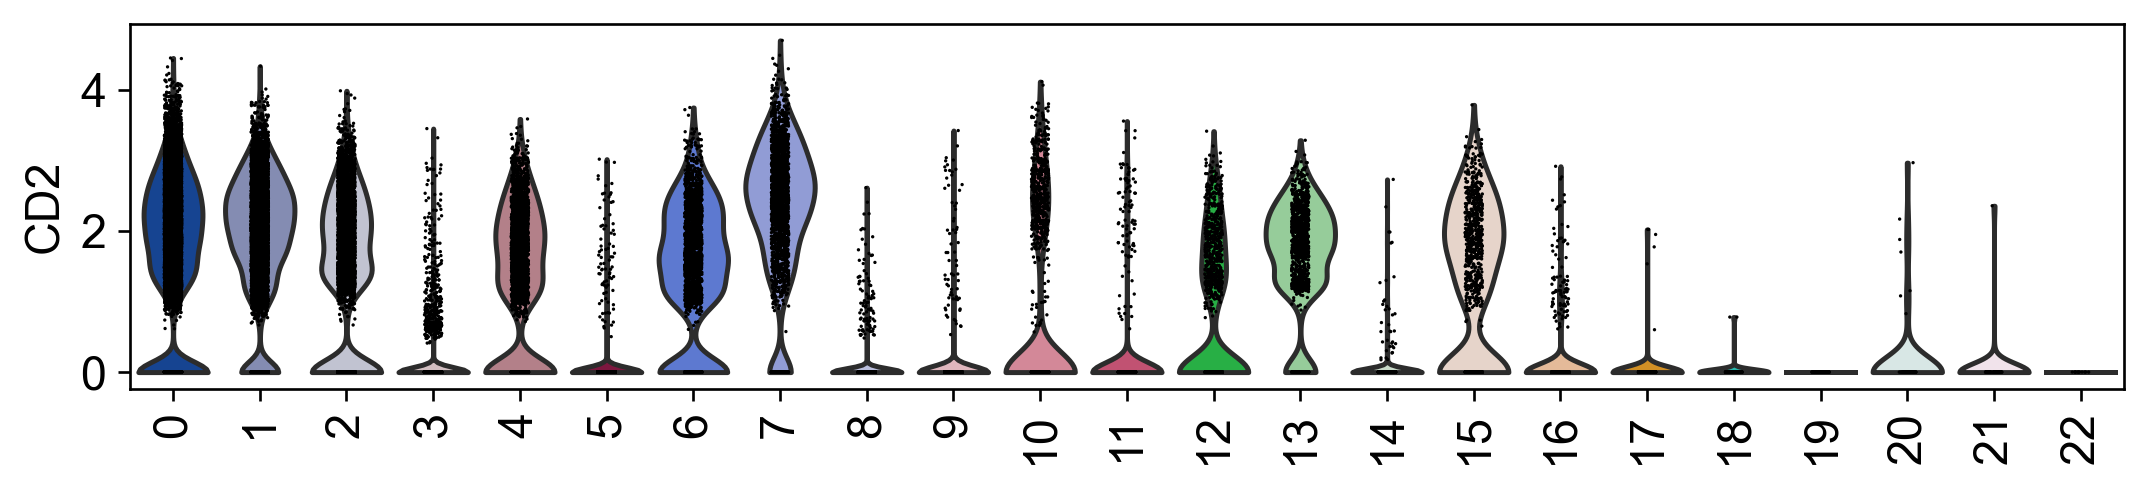

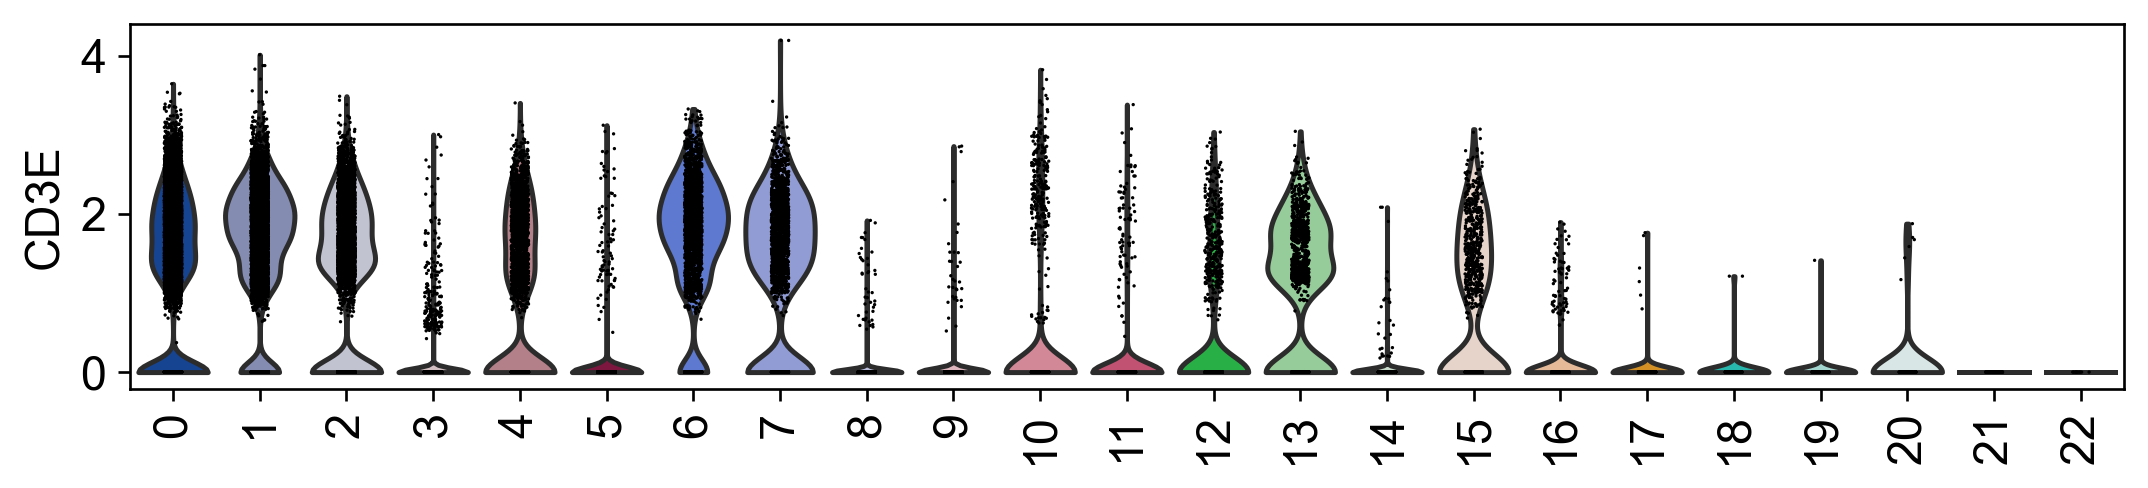

In [16]:
with rc_context({'figure.figsize': (9, 2), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.violin(adata, ['CD2'], groupby = 'louvain', wspace=0.5, rotation = 90)
    sc.pl.violin(adata, ['CD3D'], groupby = 'louvain', wspace=0.5, rotation = 90)
    sc.pl.violin(adata, ['CD3E'], groupby = 'louvain', wspace=0.5, rotation = 90)

## Annotation

In [17]:
# adata.obs['louvain_anno'] = adata.obs['louvain'].replace(
#     ['0', '1', '2', '3', '4', 
#     '5', '6', '7', '8', '9', 
#     '10', '11', '12', '13', '14', 
#     '15', '16', '17', '18', '19',
#     '20', '21', '22', '23', '24',
#     '25', '26', '27', '28', '29',
#     '30', '31', '32'
#     ],
#     ['T cells', 'T cells', 'T cells', 'Epithelial cells', 'Myeloid cells', 
#     'NK cells', 'Myeloid cells', 'Mast cells', 'T cells', 'Myeloid cells', 
#     'NK cells', 'Myeloid cells', 'Epithelial cells', 'B cells', 'NK cells', 
#     'Myeloid cells', 'Endothelial cells', 'T cells', 'Myeloid cells', 'Epithelial cells',
#     'Fibroblast cells', 'Epithelial cells', 'Epithelial cells', 'Epithelial cells', 'Plasma cells',
#     'Plasma cells', 'Epithelial cells', 'Epithelial cells', 'Plasma cells', 'Endothelial cells',
#     'Endothelial cells', 'Fibroblast cells', 'Mast cells'
#     ])

In [18]:
adata.obs['louvain_anno'] = adata.obs['louvain'].replace(
    ['0', '1', '2', '3', '4', 
    '5', '6', '7', '8', '9', 
    '10', '11', '12', '13', '14', 
    '15', '16', '17', '18', '19',
    '20', '21', '22'
    ],
    ['T cells', 'T cells', 'T cells', 'Myeloid cells', 'NK cells', 
    'Epithelial cells', 'T cells', 'T cells', 'Myeloid cells', 'Endothelial cells', 
    'T cells', 'B cells', 'NK cells', 'T cells', 'Plasma cells', 
    'NK cells', 'B cells', 'Epithelial cells', 'Fibroblast cells', 'Fibroblast cells',
    'Mast cells', 'Epithelial cells', 'Epithelial cells'
    ])

In [19]:
# adata.obs['louvain_anno'] = adata.obs['louvain'].replace(
#     ['0', '1', '2', '3', '4', 
#     '5', '6', '7', '8', '9', 
#     '10', '11', '12', '13', '14', 
#     '15', '16', '17', '18', '19',
#     '20', '21', '22', '23', '24',
#     '25', '26', '27', '28', '29',
#     '30', '31', '32'
#     ],
#     ['T cells', 'T cells', 'T cells', 'Myeloid cells', 'Myeloid cells', 
#     'NK cells', 'Myeloid cells', 'Mast cells', 'T cells', 'Myeloid cells', 
#     'NK cells', 'Myeloid cells', 'Epithelial cells', 'B cells', 'NK cells', 
#     'Myeloid cells', 'Endothelial cells', 'T cells', 'Myeloid cells', 'Myeloid cells',
#     'Fibroblast cells', 'Epithelial cells', 'Epithelial cells', 'Epithelial cells', 'Plasma cells',
#     'Plasma cells', 'Myeloid cells', 'Epithelial cells', 'Plasma cells', 'Endothelial cells',
#     'Endothelial cells', 'Fibroblast cells', 'Mast cells'
#     ])

In [20]:
adata.obs['louvain_anno'].cat.categories

Index(['T cells', 'Myeloid cells', 'NK cells', 'Epithelial cells',
       'Endothelial cells', 'B cells', 'Plasma cells', 'Fibroblast cells',
       'Mast cells'],
      dtype='object')

In [21]:
adata.obs['louvain_anno'].cat.reorder_categories(
    ['T cells', 'NK cells', 'Myeloid cells', 'Mast cells', 'B cells', 'Plasma cells', 'Epithelial cells', 'Fibroblast cells', 'Endothelial cells'], inplace=True, ordered=True)

/var/folders/nt/95vmy3614zd_8x3sv2ktwn7c0000gp/T/ipykernel_57614/4158033302.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['louvain_anno'].cat.reorder_categories(


In [22]:
adata.obs['louvain_anno'].cat.categories

Index(['T cells', 'NK cells', 'Myeloid cells', 'Mast cells', 'B cells',
       'Plasma cells', 'Epithelial cells', 'Fibroblast cells',
       'Endothelial cells'],
      dtype='object')

In [23]:
adata.obs['louvain_anno'].value_counts()

T cells              36566
Myeloid cells         6549
NK cells              5283
Epithelial cells      2743
B cells               2046
Endothelial cells     1703
Plasma cells           980
Fibroblast cells       215
Mast cells              78
Name: louvain_anno, dtype: int64

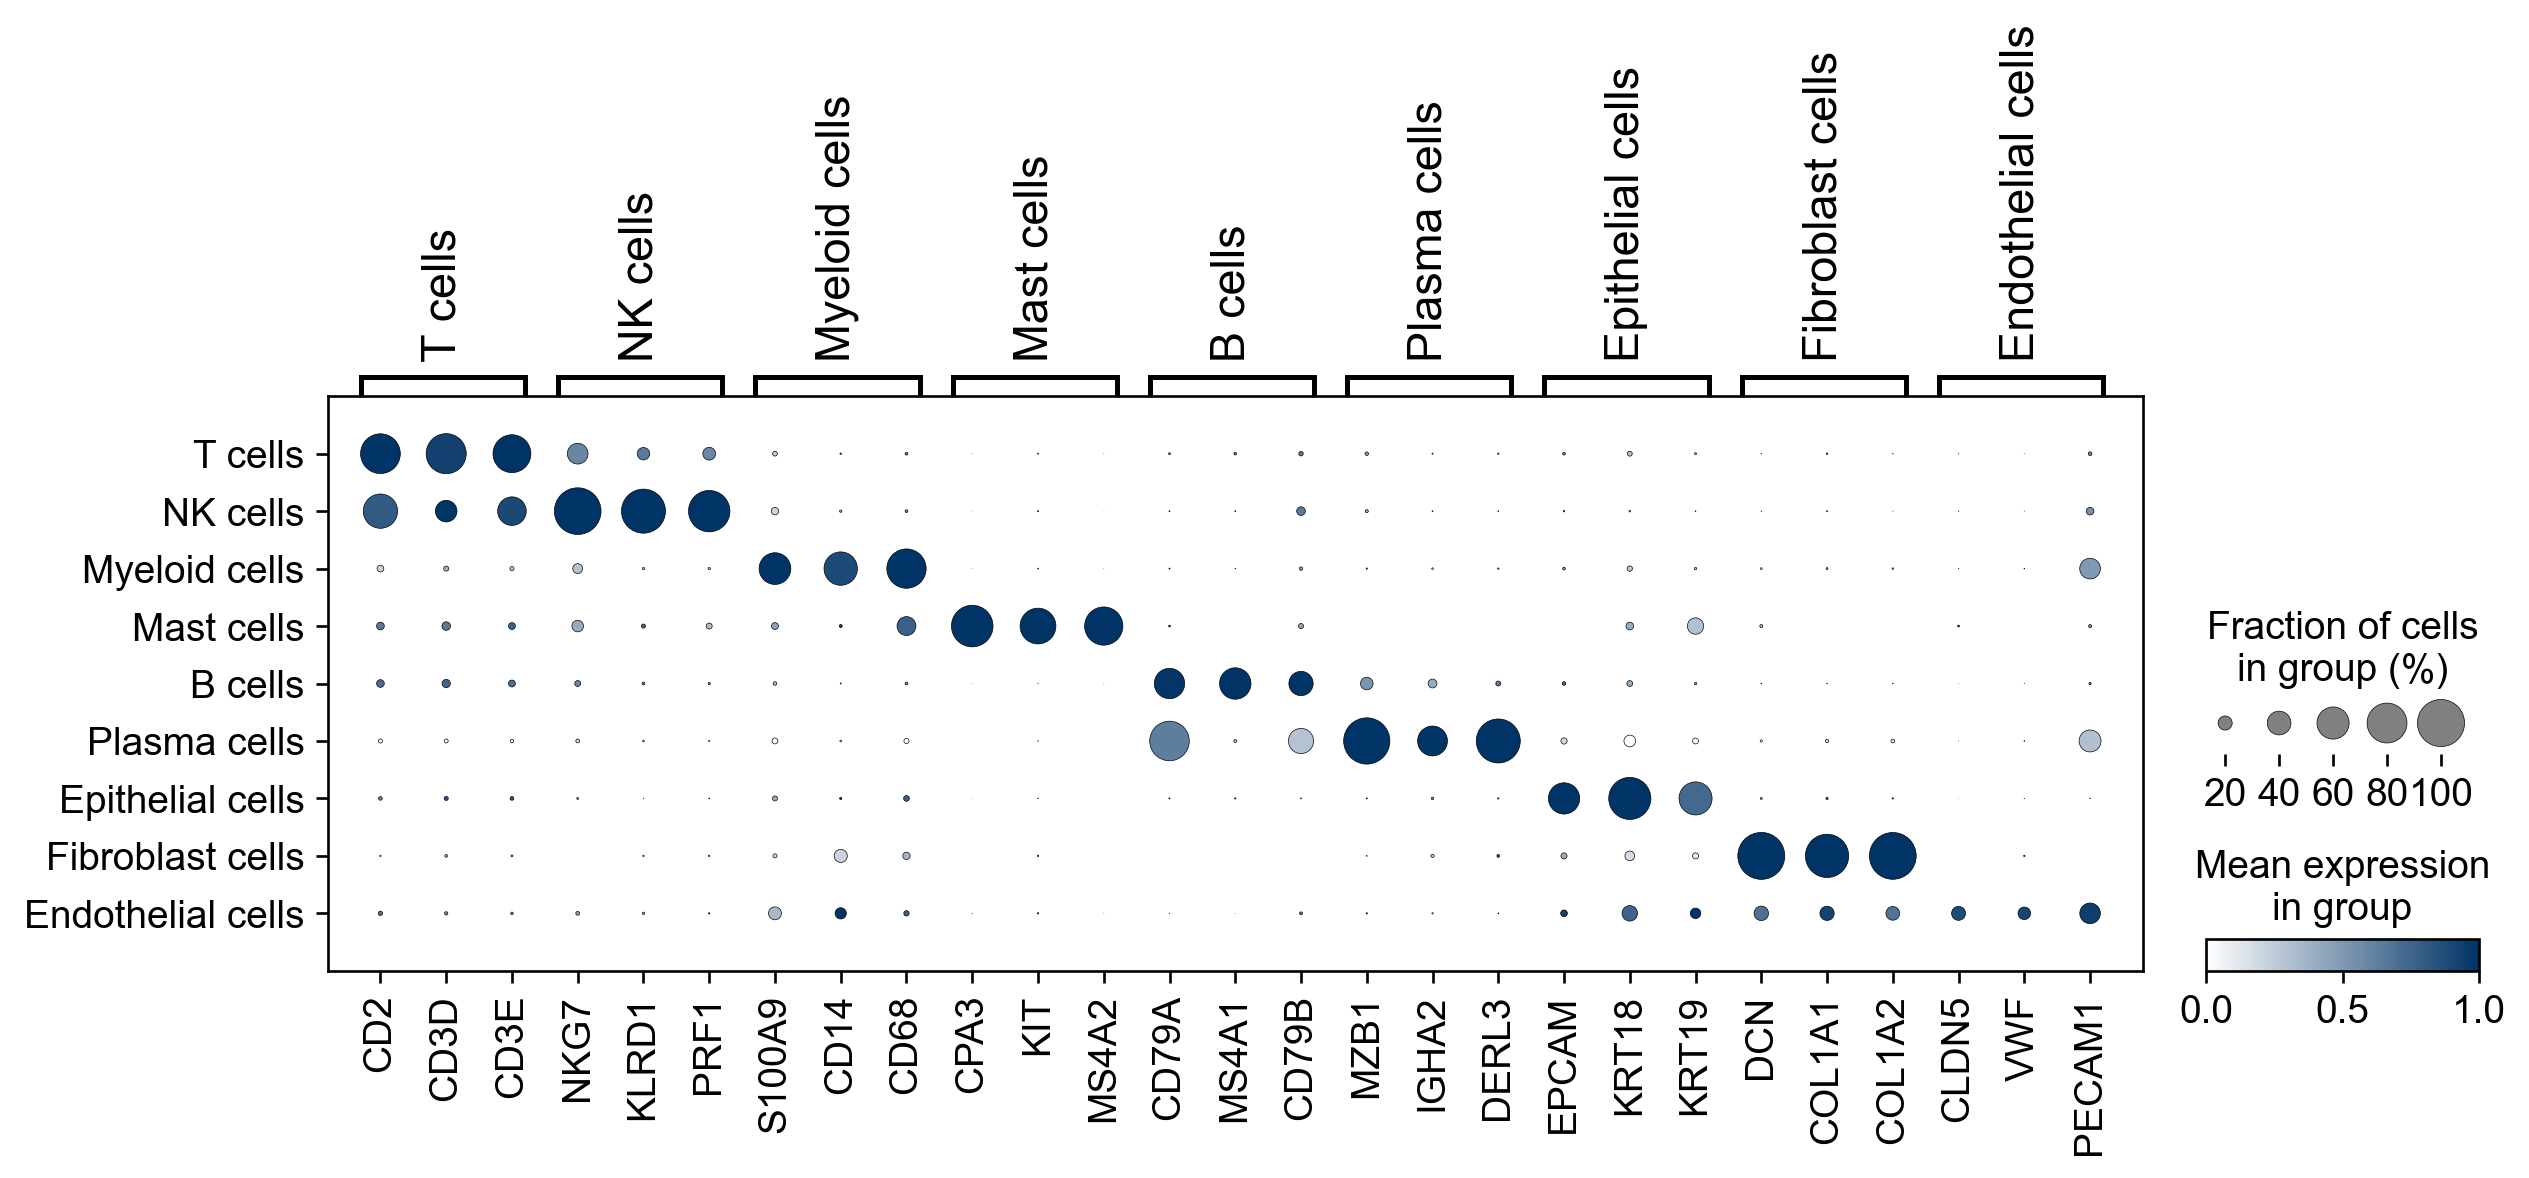

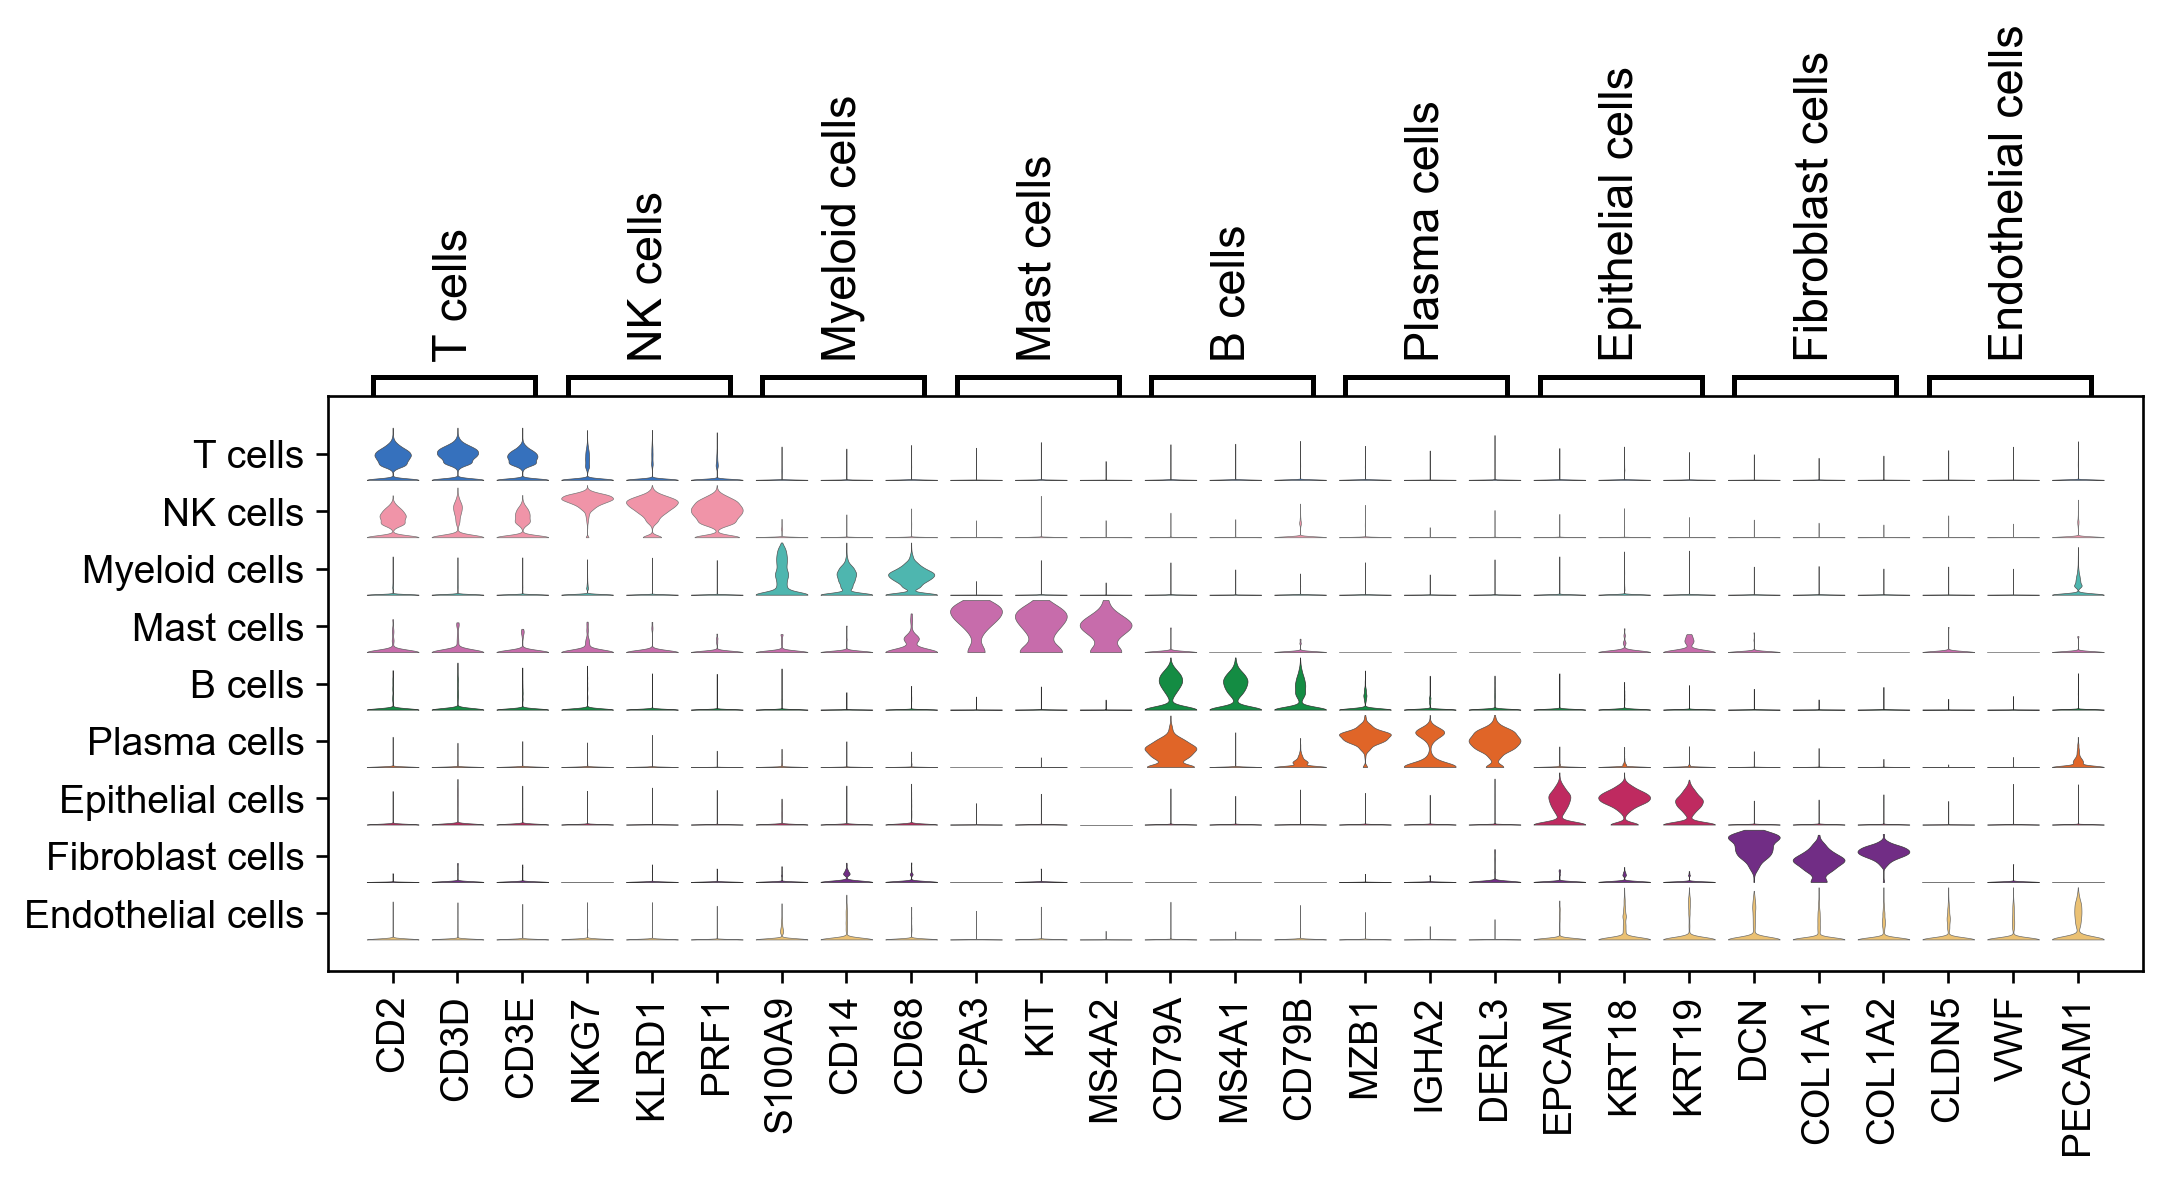

In [37]:
marker_genes_dict = {
    'T cells': ['CD2', 'CD3D', 'CD3E'],
    'NK cells': ['NKG7', 'KLRD1', 'PRF1'],
    'Myeloid cells': ['S100A9', 'CD14', 'CD68'],
    'Mast cells': ['CPA3', 'KIT', 'MS4A2'],
    'B cells': ['CD79A', 'MS4A1', 'CD79B'],
    'Plasma cells': ['MZB1', 'IGHA2', 'DERL3'],
    'Epithelial cells': ['EPCAM', 'KRT18', 'KRT19'],
    'Fibroblast cells': ['DCN', 'COL1A1', 'COL1A2'],
    'Endothelial cells': ['CLDN5', 'VWF', 'PECAM1'],    
}

color_loc_1 = mpl.colors.LinearSegmentedColormap.from_list('1', [(0, '#FFFFFF'), (1, '#003366')], N=256)

with rc_context({'figure.figsize': (12, 6), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False'}):
    sc.pl.dotplot(adata, marker_genes_dict, groupby='louvain_anno', cmap=color_loc_1, swap_axes=False, dendrogram=False, 
    mean_only_expressed=True, standard_scale='var', show=True, save="02_marker_genes_dict.pdf")

## Violin of gene expression
with rc_context({'figure.figsize': (12, 6), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False'}):
    sc.pl.stacked_violin(adata, marker_genes_dict, groupby='louvain_anno', values_to_plot='logfoldchanges', var_group_rotation=90, rotation=0,
    row_palette=['#1F6ED4', '#FF859F', '#3DC7BE', '#D65DB1', '#00a03e', '#FF5A09', '#D81159', '#791E94', '#FFC75F'], vmax=1, vmin=-1, 
    standard_scale='var', mean_only_expressed=True, swap_axes=False, dendrogram=False, show=True, save="02_annotation_marker_exp_v2.pdf")

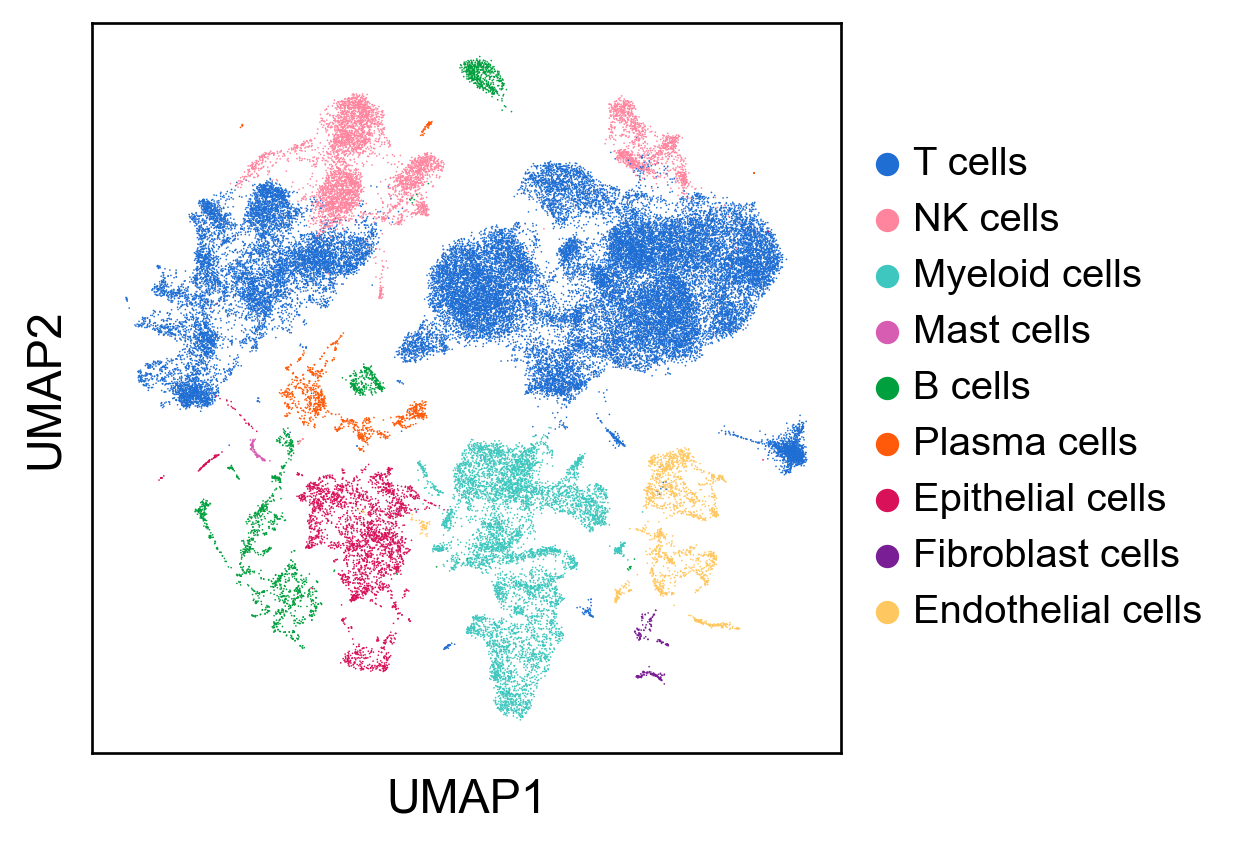

In [38]:
with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color=['louvain_anno'], title='', size=1, legend_fontsize=12, legend_loc='right margin', 
    palette=['#1F6ED4', '#FF859F', '#3DC7BE', '#D65DB1', '#00a03e', '#FF5A09', '#D81159', '#791E94', '#FFC75F'], frameon=True, show=True, save='_01_louvain_anno.pdf')

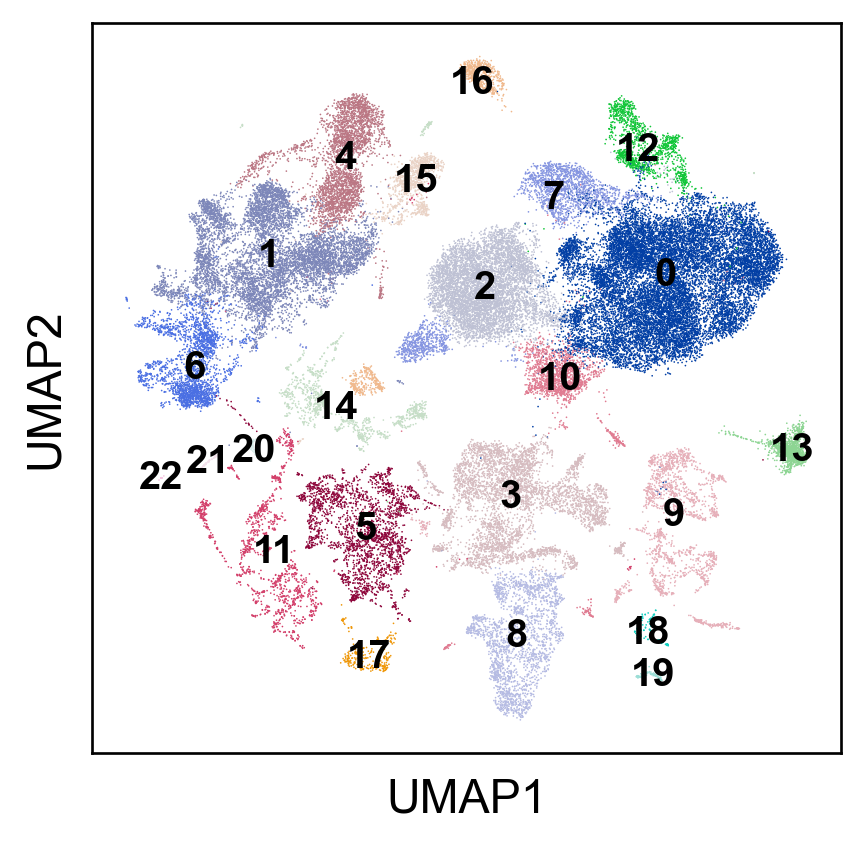

In [39]:
with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata, color = ['louvain'], title='', size=1, legend_loc='on data', legend_fontsize=12, frameon=True, wspace=0.5, show=True, save="_02_louvain_num.pdf")